2 Compresión de imágenes
En el archivo dataset_imagenes1.zip se encuentran n imágenes. Cada imagen es una matriz de p × p que
puede representarse como un vector x ∈ Rp∗p. A su vez, es posible armar un matriz de datos apilando los
vectores de cada imagen generando una matriz de n × (p ∗ p). Se desea aprender una representación de baja
dimensión de las imágenes mediante una descomposición en valores singulares.
1. Aprender una representación basada en Descomposición de Valores Singulares utilizando las n imágenes.
2. Visualizar en forma matricial p × p las imágenes reconstruidas luego de compresión con distintos
valores de d dimensiones ¿Qué conclusiones pueden sacar?

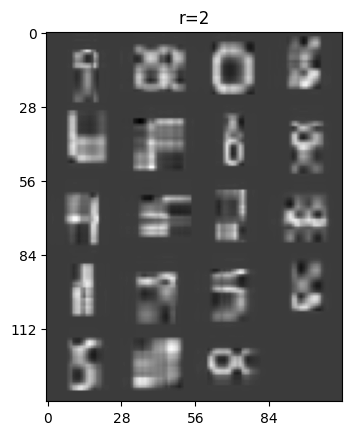

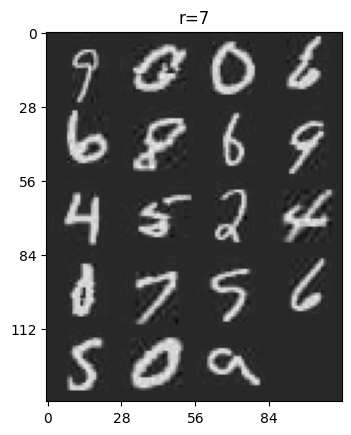

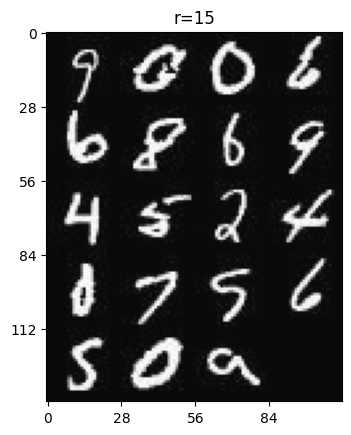

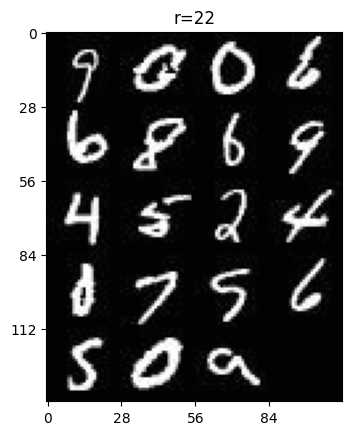

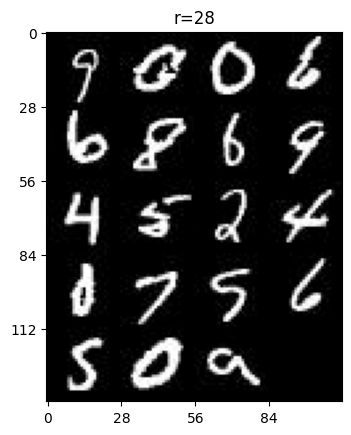

In [27]:
from matplotlib.image import imread
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import os

folder = folder = "C:/Users/juand/OneDrive/Documentos/Workspace/I202/I202TP34/TP3/datasets_imgs"

image_names = os.listdir(folder)
image_names.sort()

svds = []

for image in image_names:
    A = imread(folder + "/" + image)
    X = np.mean(A, -1) #Lo lleva a escala de grises
    U, S, VT = np.linalg.svd(A, full_matrices = False)
    S = np.diag(S)
    svds.append((U, S, VT))

dicc_collages = {}
dicc_Xs = {}
for r in (2, 7, 15, 22, 28):
    Xs = []
    collage = np.zeros((140, 112))
    for i in range(len(image_names)):
        U, S, VT = svds[i]
        Xapprox = U[:,:r]@S[:r,:r]@VT[:r,:]
        Xs.append(Xapprox)
        for f in range(28):
            for c in range(28):
                collage[f + (i // 4) * 28, c + (i % 4) * 28] = Xapprox[f,c]
    dicc_Xs[r] = Xs
    dicc_collages[r] = collage
   

for r in dicc_collages:
    plt.figure()
    img = plt.imshow(dicc_collages[r], cmap = 'gray')
    plt.xticks(np.arange(0, dicc_collages[r].shape[1], 28))
    plt.yticks(np.arange(0, dicc_collages[r].shape[0], 28))
    plt.title(f'r={r}')
    plt.show()

3. Utilizando compresión con distintos valores de d medir la similaridad entre pares de imágenes (con
alguna métrica de similaridad que decida el autor) en un espacio de baja dimensión d. Analizar cómo
la similaridad entre pares de imágenes cambia a medida que se utilizan distintos valores de d. Cuales
imágenes se encuentran cerca entre si? Alguna interpretación al respecto? Ayuda: ver de utilizar una
matriz de similaridad para visualizar todas las similaridades par-a-par juntas.

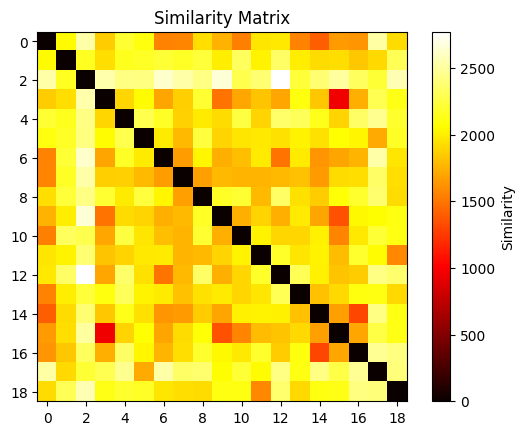

In [33]:
from scipy.spatial.distance import cdist

matrices = dicc_Xs[2] 

vectors = [matrix.flatten() for matrix in matrices]

similarity_matrix = cdist(vectors, vectors, 'euclidean')

import matplotlib.pyplot as plt

plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Similarity')
plt.title('Similarity Matrix')
plt.xticks(range(0, 20, 2))
plt.yticks(range(0, 20, 2))
plt.show()